<a href="https://colab.research.google.com/github/jonatansg/CEIABD/blob/main/M%C3%A1quinas_de_Vector_de_Soporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Iris sp | Clasificador SGD para LR y SVM**


## **Importar bibliotecas y conjunto de datos iris.csv**




In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

df= pd.read_csv('iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


El código anterior importa la biblioteca `pandas` con el alias `pd`, que se usa para manipulación y análisis de datos. También importa `pyplot` del módulo `matplotlib` con el alias `plt`, una biblioteca para visualización de datos. La instrucción `%matplotlib inline` permite que los gráficos generados con `matplotlib` se muestren directamente en el entorno donde se ejecuta el código, como Jupyter Notebook.

Lee un archivo CSV llamado `iris.csv` usando la función `read_csv` de `pandas`, y almacena los datos en un DataFrame llamado `df`. Luego, muestra el contenido del DataFrame `df`.

In [ ]:
df1 = df.drop('Id', axis=1)

In [ ]:
df['Species'].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


El código anterior crea un nuevo DataFrame llamado `df1` a partir de `df`, eliminando la columna llamada `Id`. La opción `axis=1` indica que la operación se realiza en las columnas.

Muestra el conteo de valores únicos en la columna `Species` de `df`, lo cual indica la cantidad de veces que cada especie aparece en el conjunto de datos.

## **Comprobar si faltan datos en las funciones**

In [ ]:
df.isna().sum()

,0
Id,0
SepalLengthCm,0
SepalWidthCm,0
PetalLengthCm,0
PetalWidthCm,0
Species,0


El código anterior muestra la cantidad de valores nulos (NA) en cada columna del DataFrame `df`. La función `isna()` identifica los valores nulos en `df`, y `sum()` calcula la suma de valores nulos por columna, proporcionando una visión general de los datos faltantes en cada una de ellas.

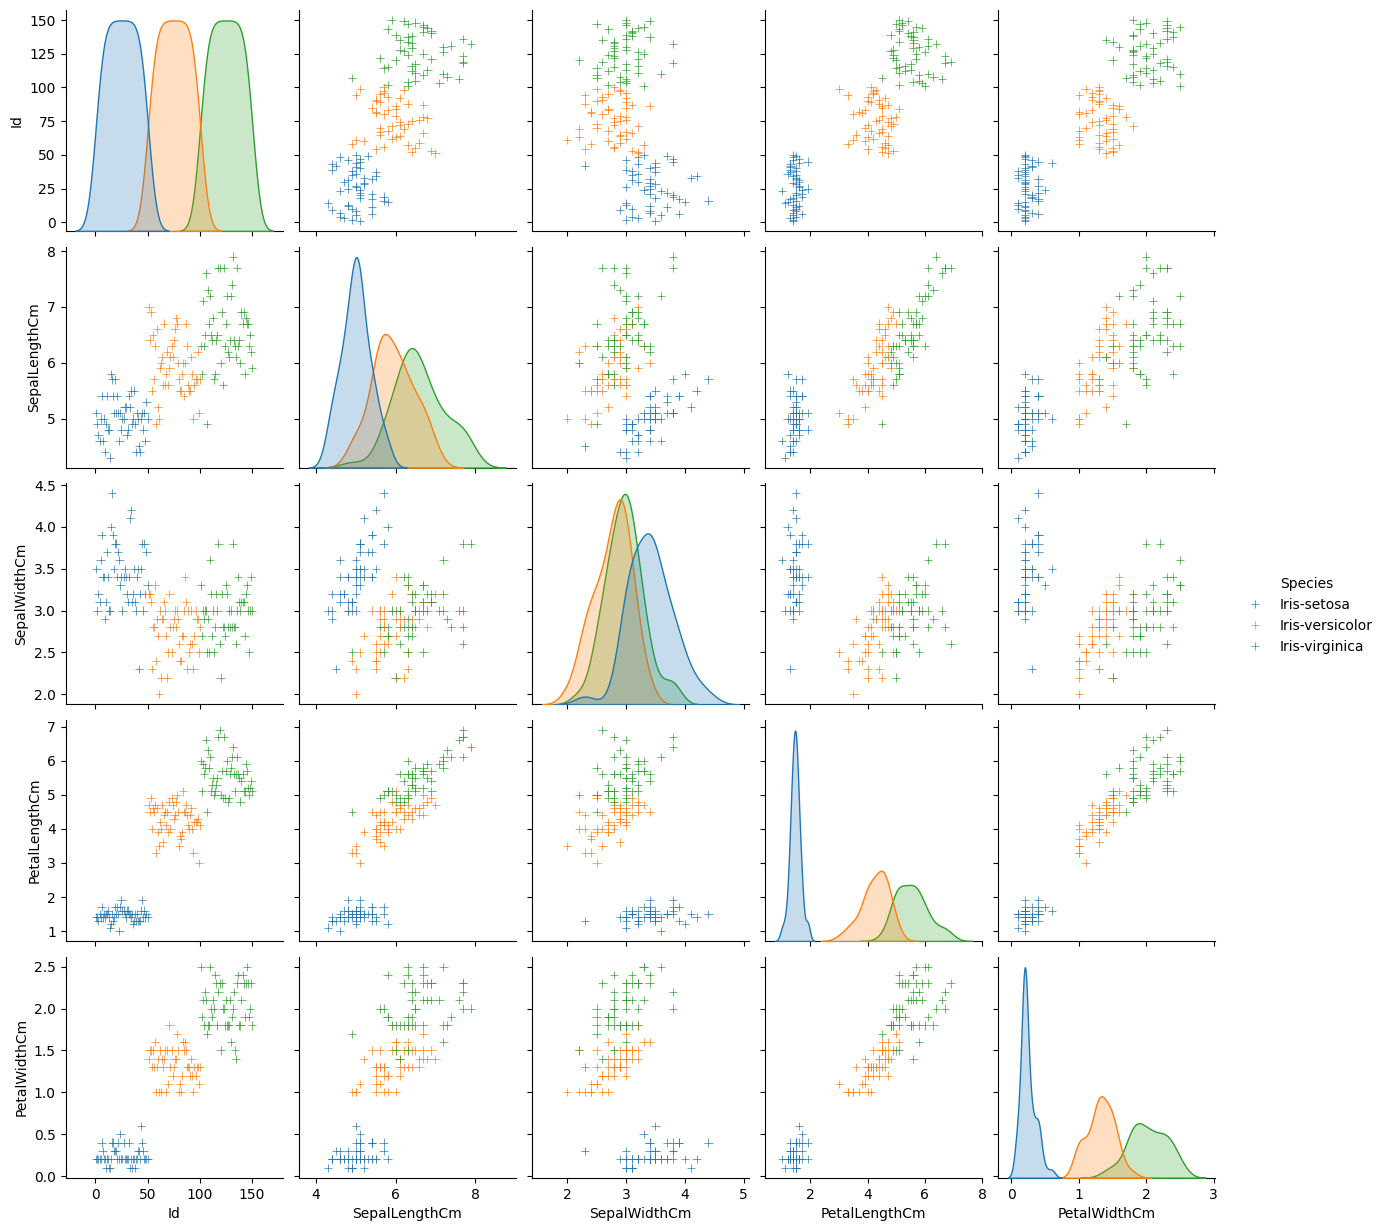

In [ ]:
import seaborn as sns
g = sns.pairplot(df, hue='Species', markers='+')
plt.show()

El código anterior importa la biblioteca `seaborn` con el alias `sns`, que se utiliza para crear gráficos estadísticos. Usa la función `pairplot` de `seaborn` para crear una cuadrícula de gráficos de dispersión que muestra las relaciones entre pares de variables en el DataFrame `df`. La opción `hue='Species'` colorea los puntos según las distintas especies, facilitando la comparación visual entre ellas. La opción `markers='+'` configura el marcador de los puntos en forma de cruz. Finalmente, `plt.show()` muestra el gráfico en pantalla.

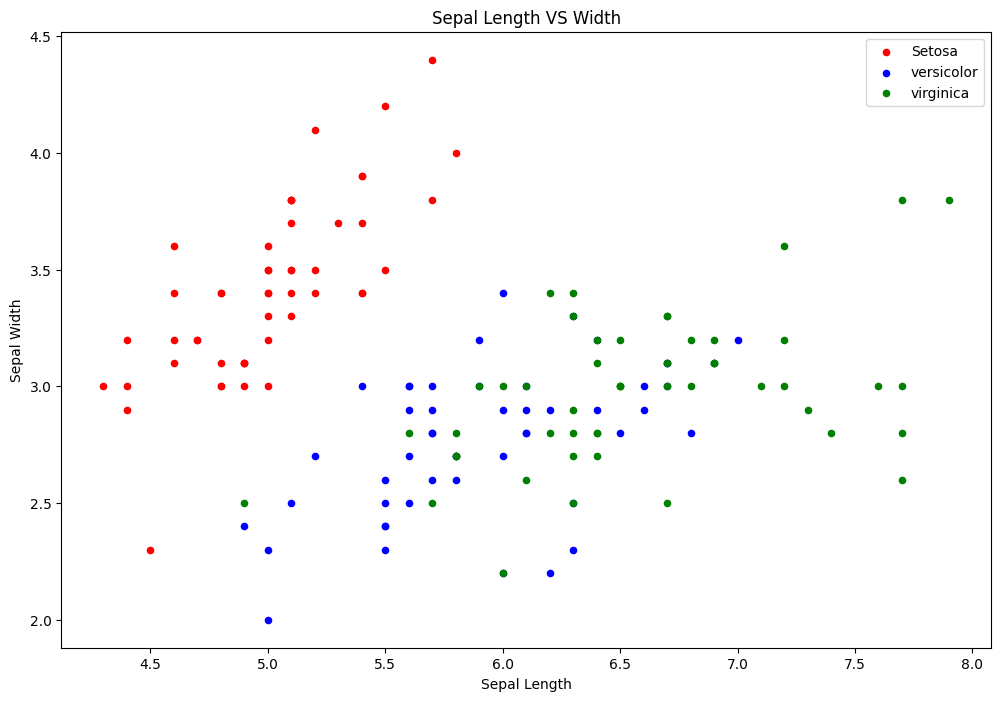

In [ ]:
fig = df1[df1.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='red', label='Setosa')
df1[df1.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=fig)
df1[df1.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

El código anterior filtra el DataFrame `df1` para obtener solo las filas en las que la especie es `Iris-setosa`, y crea un gráfico de dispersión con `SepalLengthCm` en el eje x y `SepalWidthCm` en el eje y. Asigna el color rojo a los puntos y usa la etiqueta 'Setosa' para la leyenda. El gráfico se guarda en la variable `fig`.

Luego, realiza el mismo proceso para la especie `Iris-versicolor`, asignando el color azul a los puntos y la etiqueta 'versicolor'. Usa el mismo objeto de gráfico `fig` para superponer los puntos en el mismo gráfico.

Repite el proceso para `Iris-virginica`, usando el color verde y la etiqueta 'virginica', también sobre el mismo gráfico.

Configura la etiqueta del eje x como "Sepal Length" y la del eje y como "Sepal Width". Establece el título del gráfico como "Sepal Length VS Width". Guarda la figura actual en la variable `fig` usando `plt.gcf()` y ajusta el tamaño del gráfico a 12 x 8 pulgadas. Finalmente, muestra el gráfico en pantalla con `plt.show()`.

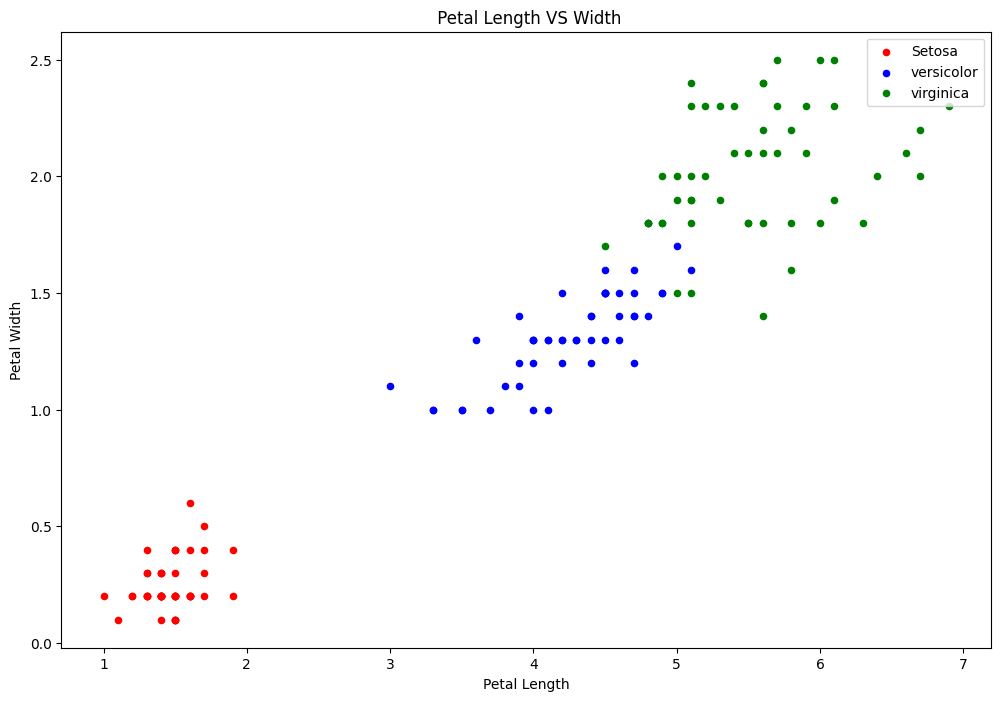

In [ ]:
fig = df1[df1.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='red', label='Setosa')
df1[df1.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=fig)
df1[df1.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(12,8)
plt.show()

El código anterior filtra el DataFrame `df1` para seleccionar solo las filas donde la especie es `Iris-setosa`, y crea un gráfico de dispersión con `PetalLengthCm` en el eje x y `PetalWidthCm` en el eje y. Los puntos del gráfico se muestran en rojo y llevan la etiqueta 'Setosa'. Guarda el gráfico en la variable `fig`.

Luego, realiza el mismo procedimiento para la especie `Iris-versicolor`, asignando color azul a los puntos y la etiqueta 'versicolor'. El gráfico se superpone en `fig`.

Repite el proceso para la especie `Iris-virginica`, usando el color verde y la etiqueta 'virginica', también superponiéndolo en el gráfico `fig`.

Configura la etiqueta del eje x como "Petal Length" y la del eje y como "Petal Width". Establece el título del gráfico como "Petal Length VS Width". Guarda la figura actual en `fig` usando `plt.gcf()` y ajusta su tamaño a 12 x 8 pulgadas. Finalmente, muestra el gráfico en pantalla con `plt.show()`.

In [ ]:
df.drop(['Id'] ,inplace =True , axis =1)

In [ ]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


El código anterior elimina la columna `Id` del DataFrame `df`. La opción `inplace=True` indica que la eliminación se realiza directamente en `df` sin crear una copia. La opción `axis=1` especifica que la operación se aplica en las columnas. Finalmente, muestra el contenido actualizado de `df` sin la columna `Id`.

**## Usando 20% de datos train_test_split para pruebas**

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [ ]:
X_train = train.drop(columns=['Species'],axis=1)
y_train = train['Species']
X_train = X_train /10
X_test = test.drop(columns=['Species'],axis=1)
y_test = test['Species']
X_test /=10

print(X_train.head())

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
52            0.69          0.31           0.49          0.15
116           0.65          0.30           0.55          0.18
62            0.60          0.22           0.40          0.10
92            0.58          0.26           0.40          0.12
91            0.61          0.30           0.46          0.14


El código anterior importa la función `train_test_split` desde la biblioteca `sklearn.model_selection`, que se utiliza para dividir el conjunto de datos en conjuntos de entrenamiento y prueba.

Divide el DataFrame `df` en dos partes, `train` y `test`, usando `train_test_split`. El tamaño del conjunto de prueba (`test_size=0.2`) es el 20% del total de datos, mientras que el conjunto de entrenamiento contiene el 80%.

Crea `X_train` eliminando la columna `Species` del conjunto de entrenamiento `train`, que contiene las características del modelo. Luego, asigna la columna `Species` de `train` a `y_train`, que contiene las etiquetas.

Divide todos los valores de `X_train` entre 10 para normalizar las características.

De manera similar, `X_test` se obtiene eliminando la columna `Species` del conjunto de prueba `test`, y `y_test` se establece con los valores de la columna `Species` de `test`. Los valores de `X_test` también se dividen entre 10.

Muestra las primeras filas de `X_train` con `print(X_train.head())`.

## **SGDClassifier se ejecuta para Logistic Reg y predice especies**

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression()

In [ ]:
LR_model.fit(X_train,y_train)

LogisticRegression()

El código anterior importa el modelo `SGDClassifier` y `LogisticRegression` desde la biblioteca `sklearn.linear_model`, que se usan para problemas de clasificación.

Crea una instancia del modelo `LogisticRegression` llamada `LR_model`, que aplica regresión logística para clasificar los datos.

Entrena el modelo `LR_model` usando el conjunto de entrenamiento `X_train` para las características y `y_train` para las etiquetas con el método `fit`.

In [ ]:
LR_predict = LR_model.predict(X_test)
print(LR_predict)

['Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica']


Usa el modelo entrenado `LR_model` para hacer predicciones sobre el conjunto de prueba `X_test` con el método `predict`, y almacena las predicciones en la variable `LR_predict`.

Finalmente, imprime las predicciones de `LR_predict`, que son las clases (especies) que el modelo ha asignado a cada una de las muestras en el conjunto de prueba.

## **Log Reg: Precisión, Precesión, Recuperación, F1, Valor cruzado (cv=5)**

In [ ]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

print(accuracy_score(LR_predict, y_test))
print(precision_score(LR_predict, y_test,average='macro'))
print(recall_score(LR_predict, y_test,average='macro'))
print(f1_score(LR_predict, y_test,average='macro'))

1.0
1.0
1.0
1.0


El código anterior importa las funciones `accuracy_score`, `precision_score`, `recall_score` y `f1_score` desde `sklearn.metrics`, que se utilizan para evaluar el rendimiento de un modelo de clasificación.

Calcula y muestra varias métricas de evaluación:

- `accuracy_score(LR_predict, y_test)`: Calcula la precisión global del modelo, es decir, el porcentaje de predicciones correctas sobre el total de muestras.
- `precision_score(LR_predict, y_test, average='macro')`: Calcula la precisión promedio del modelo (considerando todas las clases por igual), que mide la proporción de verdaderos positivos entre los elementos etiquetados como positivos.
- `recall_score(LR_predict, y_test, average='macro')`: Calcula el recall promedio del modelo (también considerado para todas las clases por igual), que mide la proporción de verdaderos positivos entre los elementos que realmente son positivos.
- `f1_score(LR_predict, y_test, average='macro')`: Calcula la puntuación F1 promedio, que es la media armónica entre precisión y recall.

Estas métricas proporcionan una evaluación detallada del rendimiento del modelo sobre el conjunto de prueba.

In [ ]:
from sklearn.model_selection import cross_val_score

print( cross_val_score(LR_model,X_train,y_train,cv=5,scoring='accuracy'))

[0.91666667 0.95833333 0.83333333 1.         0.95833333]


Importa la función `cross_val_score` desde `sklearn.model_selection`, que se utiliza para realizar validación cruzada en el modelo.

Aplica validación cruzada al modelo `LR_model` utilizando el conjunto de entrenamiento `X_train` y las etiquetas `y_train`, con 5 particiones (`cv=5`). Esto significa que el conjunto de datos se divide en 5 partes, y el modelo se entrena 5 veces, cada vez con 4 partes del conjunto de entrenamiento y evaluado en la parte restante.

El parámetro `scoring='accuracy'` indica que se usará la precisión (accuracy) como métrica de evaluación. El resultado es un array con las puntuaciones de precisión para cada una de las 5 particiones.

Finalmente, imprime las puntuaciones obtenidas en la validación cruzada.

## **Ejecución de SGDClassifier para máquinas de vectores de soporte (SVM); y predecir especies**

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

smv_model = SVC()

In [ ]:
smv_model.fit(X_test, y_test)

SVC()

El código anterior importa el modelo `SGDClassifier` y el clasificador de máquinas de soporte vectorial `SVC` desde `sklearn.linear_model` y `sklearn.svm`, respectivamente.

Crea una instancia del clasificador `SVC` llamada `smv_model`, que se usa para clasificación utilizando el algoritmo de Máquinas de Soporte Vectorial (SVM).

Luego, entrena el modelo `smv_model` usando el conjunto de prueba `X_test` y las etiquetas `y_test`. Sin embargo, es importante mencionar que normalmente el conjunto de entrenamiento (`X_train` y `y_train`) se utiliza para entrenar el modelo, no el conjunto de prueba, ya que este último debe reservarse para la evaluación del modelo después del entrenamiento.

In [ ]:
smv_predict = smv_model.fit(X_test, y_test)
print(smv_predict)
print(y_test)

SVC()
22         Iris-setosa
93     Iris-versicolor
33         Iris-setosa
31         Iris-setosa
26         Iris-setosa
104     Iris-virginica
12         Iris-setosa
13         Iris-setosa
59     Iris-versicolor
48         Iris-setosa
68     Iris-versicolor
114     Iris-virginica
138     Iris-virginica
147     Iris-virginica
6          Iris-setosa
7          Iris-setosa
108     Iris-virginica
44         Iris-setosa
137     Iris-virginica
66     Iris-versicolor
53     Iris-versicolor
19         Iris-setosa
135     Iris-virginica
140     Iris-virginica
118     Iris-virginica
55     Iris-versicolor
133     Iris-virginica
24         Iris-setosa
38         Iris-setosa
109     Iris-virginica
Name: Species, dtype: object


Estamos usando `smv_model.fit(X_test, y_test)` para entrenar el modelo `SVC` con el conjunto de prueba, lo cual no es lo habitual, ya que el conjunto de prueba debería usarse solo para evaluar el modelo después de haber sido entrenado con el conjunto de entrenamiento.

La función `fit` entrena el modelo, pero en este código, el valor de retorno de `fit()` es el propio modelo entrenado, no las predicciones. Por lo tanto, el valor de `smv_predict` será el objeto del modelo `SVC` ya entrenado, no las predicciones.


## **SVM: Precisión, Precesión, Recuperación, F1, Valor cruzado (cv=5)**



In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
smv_model = SVC()

smv_model.fit(X_test, y_test)

SVC()

Se importa el clasificador `SVC` desde `sklearn.svm` para crear un modelo de Máquinas de Soporte Vectorial. Luego, se crea una instancia del modelo `SVC` y se asigna a la variable `smv_model`. El modelo se entrena utilizando el conjunto de prueba `X_test` y sus etiquetas `y_test` mediante el método `fit`. Sin embargo, esto es incorrecto, ya que el conjunto de prueba debería usarse para evaluar el modelo, no para entrenarlo. Normalmente, se entrena el modelo con el conjunto de entrenamiento y luego se evalúa con el conjunto de prueba.

In [ ]:
accuracy_score = smv_model.score(X_test,y_test)
print(accuracy_score)

0.9666666666666667


En este código, se utiliza el método `score` del modelo `smv_model` para calcular la precisión del modelo SVM. El método `score` devuelve el valor de precisión (accuracy), que es la proporción de predicciones correctas sobre el total de muestras en el conjunto de prueba `X_test` con las etiquetas correspondientes `y_test`.

Luego, se imprime el valor de `accuracy_score`, que es el rendimiento del modelo SVM sobre el conjunto de prueba, indicando qué tan bien el modelo ha clasificado los datos.

In [ ]:
from sklearn import metrics
from sklearn.metrics import classification_report

predict = smv_model.predict(X_test)
print(predict)

['Iris-setosa' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica']


Se importa el módulo `metrics` de `sklearn` y la función `classification_report` desde `sklearn.metrics`, que se utilizan para evaluar el rendimiento de los modelos de clasificación.

Luego, el modelo `smv_model` realiza las predicciones sobre el conjunto de prueba `X_test` utilizando el método `predict`. Las predicciones obtenidas se almacenan en la variable `predict`. Después, se imprime el contenido de `predict`, que contiene las etiquetas predichas para cada muestra en el conjunto de prueba.

In [ ]:
from sklearn.metrics import classification_report

ClassR= metrics.classification_report(y_test, predict)
print(ClassR)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.83      0.91         6
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.97        30
      macro avg       0.97      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30



En este código, se importa la función `classification_report` desde `sklearn.metrics`, pero en lugar de usarla directamente, se está utilizando `metrics.classification_report(y_test, predict)`, lo que genera un informe de clasificación. Este informe proporciona un resumen de las métricas de evaluación del modelo, como precisión (precision), recall, y F1-score para cada clase, basándose en las predicciones `predict` y las etiquetas reales `y_test`.

El informe generado se almacena en la variable `ClassR`, y luego se imprime, mostrando cómo de bien el modelo ha clasificado las diferentes clases en el conjunto de prueba. Este informe es útil para evaluar el rendimiento del modelo en términos de cada clase individualmente.

## **Matriz de confusión para LR y SVM**



In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
print(y_test)

print('LR: \n', confusion_matrix(LR_predict,y_test))
print('SMV: \n', confusion_matrix(LR_predict,y_test))

22         Iris-setosa
93     Iris-versicolor
33         Iris-setosa
31         Iris-setosa
26         Iris-setosa
104     Iris-virginica
12         Iris-setosa
13         Iris-setosa
59     Iris-versicolor
48         Iris-setosa
68     Iris-versicolor
114     Iris-virginica
138     Iris-virginica
147     Iris-virginica
6          Iris-setosa
7          Iris-setosa
108     Iris-virginica
44         Iris-setosa
137     Iris-virginica
66     Iris-versicolor
53     Iris-versicolor
19         Iris-setosa
135     Iris-virginica
140     Iris-virginica
118     Iris-virginica
55     Iris-versicolor
133     Iris-virginica
24         Iris-setosa
38         Iris-setosa
109     Iris-virginica
Name: Species, dtype: object
LR: 
 [[13  0  0]
 [ 0  6  0]
 [ 0  0 11]]
SMV: 
 [[13  0  0]
 [ 0  6  0]
 [ 0  0 11]]


En este código, se importa el módulo `metrics` de `sklearn` y la función `confusion_matrix` desde `sklearn.metrics`. La función `confusion_matrix` genera una matriz de confusión, que muestra el rendimiento del modelo de clasificación al comparar las predicciones con las etiquetas reales.

Primero, se imprime el conjunto de etiquetas reales `y_test`.

Luego, se imprime la matriz de confusión para las predicciones del modelo de regresión logística (`LR_predict`) comparadas con las etiquetas reales `y_test`. La matriz de confusión muestra el número de verdaderos positivos, falsos positivos, verdaderos negativos y falsos negativos.

In [ ]:
df.to_csv('submission.csv', index=None)

Este código guarda el DataFrame `df` en un archivo CSV llamado `submission.csv`. La opción `index=None` especifica que no se incluirá una columna adicional para los índices del DataFrame en el archivo CSV generado. Esto es útil cuando no deseas que los índices de las filas del DataFrame se guarden en el archivo de salida.

El archivo `submission.csv` contendrá los datos de `df` en formato CSV, sin la columna de índices.